# 目标

- 使用模板匹配图像中的物体
- OpenCV函数：cv2.matchTemplate(), cv2.minMaxLoc()

# 教程
模板匹配就是用来在大图中寻找小图，也就是说在一幅图像中寻找另外一张模板图像的位置。

In [18]:
# 先读入图片和模板
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('lena.jpg', 0)
template = cv2.imread('face.jpg', 0)
h, w = template.shape[:2]  # rows->h, cols->w


In [19]:
print(h,w)

110 85


匹配函数返回的是一副灰度图，最白的地方表示最大的匹配。使用cv2.minMaxLoc()函数可以得到最大匹配值的坐标，以这个点为左上角角点，模板的宽和高画矩形就是匹配的位置了：

In [20]:
# 相关系数匹配方法：cv2.TM_CCOEFF
res = cv2.matchTemplate(img, template, cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

left_top = max_loc  # 左上角
right_bottom = (left_top[0] + w, left_top[1] + h)  # 右下角
cv2.rectangle(img, left_top, right_bottom, 255, 2)  # 画出矩形位置


array([[160, 159, 159, ..., 172, 170, 140],
       [162, 161, 159, ..., 174, 174, 139],
       [161, 162, 160, ..., 174, 166, 123],
       ...,
       [ 48,  50,  50, ...,  89,  91,  94],
       [ 45,  49,  46, ...,  96, 101,  98],
       [ 40,  52,  49, ...,  97, 106, 107]], dtype=uint8)

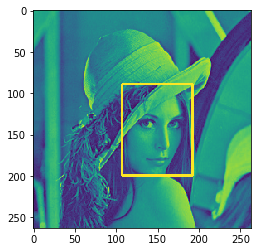

In [21]:
plt.imshow(img)
# 这个好像相差很远啊

模板匹配的原理其实很简单，就是不断地在原图中移动模板图像去比较，有6种不同的比较方法，详情可参考：TemplateMatchModes

- 平方差匹配CV_TM_SQDIFF：用两者的平方差来匹配，最好的匹配值为0
- 归一化平方差匹配CV_TM_SQDIFF_NORMED
- 相关匹配CV_TM_CCORR：用两者的乘积匹配，数值越大表明匹配程度越好
- 归一化相关匹配CV_TM_CCORR_NORMED
- 相关系数匹配CV_TM_CCOEFF：用两者的相关系数匹配，1表示完美的匹配，-1表示最差的匹配
- 归一化相关系数匹配CV_TM_CCOEFF_NORMED


归一化的意思就是将值统一到0~1，这些方法的对比代码可到源码处查看。模板匹配也是应用卷积来实现的：假设原图大小为W×H，模板图大小为w×h，那么生成图大小是(W-w+1)×(H-h+1)，生成图中的每个像素值表示原图与模板的匹配程度

# 匹配多个物体

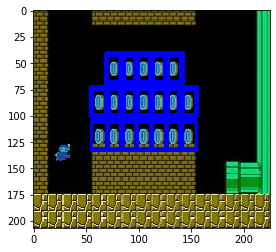

In [23]:
# 读入原图和模板
img_rgb = cv2.imread('mario.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('mario_coin.jpg', 0)
h, w = template.shape[:2]

# 2.标准相关模板匹配
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.8 

# 3.这边是Python/Numpy的知识，后面解释
loc = np.where(res >= threshold)  # 匹配程度大于%80的坐标y,x
for pt in zip(*loc[::-1]):  # *号表示可选参数
    right_bottom = (pt[0] + w, pt[1] + h)
    cv2.rectangle(img_rgb, pt, right_bottom, (0, 0, 255), 2)

plt.imshow(img_rgb)